## Model and ata simulation

In [15]:
import numpy as np

# Simulate the time series input data
def simulate_time_series(timesteps=10, features=4):
    return np.random.rand(timesteps, features)

# Define a simple prediction model that averages the features over the past 4 timesteps
def f_pred(time_series):
    if len(time_series) < 4:
        raise ValueError("Time series data should have at least 4 timesteps.")
    
    # Take the average of the last 4 timesteps for each feature
    return np.mean(time_series[-4:], axis=0)

# Define the mean squared error (MSE) loss function
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Generate simulated time series data
y = simulate_time_series(timesteps=10, features=4)
y


array([[0.4086145 , 0.11501219, 0.31769335, 0.85520892],
       [0.46191829, 0.12660696, 0.07068574, 0.37889446],
       [0.47553937, 0.68233343, 0.94405299, 0.55394027],
       [0.55049774, 0.52317943, 0.19485294, 0.27873587],
       [0.93770158, 0.91466603, 0.32419564, 0.86860027],
       [0.03511336, 0.71094192, 0.21321292, 0.20291954],
       [0.87263576, 0.50346591, 0.71409207, 0.6902319 ],
       [0.12759114, 0.91783667, 0.28723669, 0.41226698],
       [0.39238943, 0.45523211, 0.20494957, 0.62468204],
       [0.41635501, 0.85235056, 0.47382403, 0.17371627]])

## MTSexpSHAP

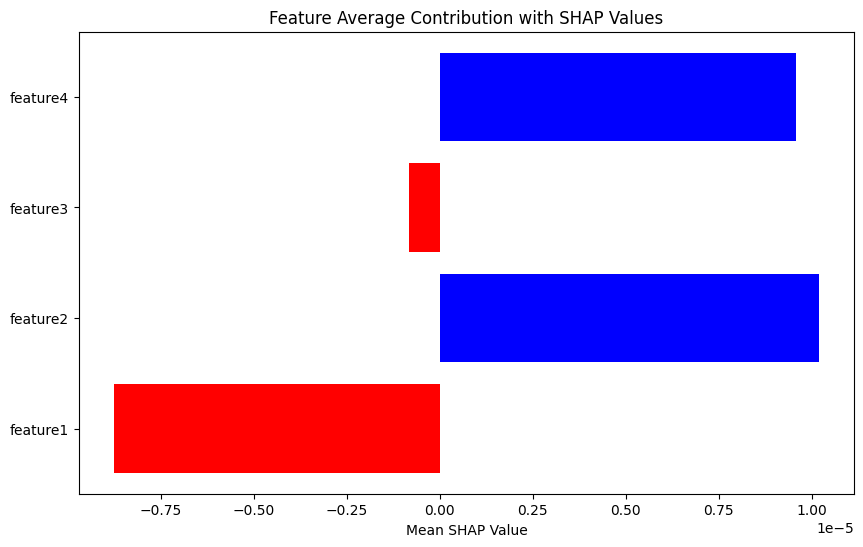

In [16]:
# Initialize the SHAP explainer
from explainers.mtsexpshap import MTSexpSHAP


shap_exp = MTSexpSHAP()
shap_exp.fit_exp(
    model=f_pred,
    loss=mse,
    feature_name_list=['feature1', 'feature2', 'feature3', 'feature4'],
    label_names=['feature2']
)

# Compute SHAP values
shap_values, perturbed_data = shap_exp.shap_values(y)

# Plot SHAP values
shap_exp.plot_shap_values(shap_values)

In [17]:
print("Shapley Values: ", shap_values)

Shapley Values:  [-8.74992958e-06  1.01911465e-05 -8.31140358e-07  9.58444219e-06]


In [18]:
perturbed_data

array([[ 0.26009292, -0.01425113,  0.02624837,  0.6727717 ],
       [ 0.62138457,  1.02585343,  0.42377314,  0.49269745],
       [ 0.22884527,  0.37799491,  0.22494979,  0.65321196],
       [ 0.83228683,  1.02110863,  0.78272821,  0.89396606],
       [ 0.1214375 ,  0.22282823,  0.60935572,  0.40474376],
       [ 0.66532986,  0.50775985,  0.21234456,  0.4315427 ],
       [ 0.10315016,  0.59285252,  0.42144439,  0.18275294],
       [ 0.53928717,  0.83321315,  0.81170311,  0.2343789 ],
       [ 0.287135  ,  0.4668054 ,  0.1372531 ,  0.5454284 ],
       [ 0.99312124,  0.83753146,  0.39645918,  0.91792913]])

In [19]:
import numpy as np

def random_permutation_with_noise_multivariate(time_series, noise_sd=0.1, num_samples=500):
    """
    Generate multiple perturbed samples with random permutation and noise for a multivariate time series dataset.
    
    Parameters:
    - time_series: numpy array of shape (timesteps, features)
    - noise_sd: standard deviation of the Gaussian noise to be added
    - num_samples: number of perturbed samples to generate
    
    Returns:
    - noisy_time_series_samples: numpy array of shape (num_samples, timesteps, features)
    """
    timesteps, features = time_series.shape
    noisy_time_series_samples = np.zeros((num_samples, timesteps, features))
    
    for i in range(num_samples):
        noisy_time_series = np.zeros_like(time_series)
        
        for feature in range(features):
            # Generate a random permutation of timesteps
            permuted_timesteps = np.random.permutation(timesteps)
            
            # Apply the permutation
            permuted_data = time_series[permuted_timesteps, feature]
            
            # Add Gaussian noise
            noise = np.random.normal(0, noise_sd, timesteps)
            noisy_time_series[:, feature] = permuted_data + noise
        
        noisy_time_series_samples[i] = noisy_time_series
    
    return noisy_time_series_samples

# Example usage:
np.random.seed(123)  # Setting seed for reproducibility

# Generate a sample multivariate time series dataset with 5 features and 10 timesteps
time_series = np.random.rand(10, 5)
print("Original Time Series:\n", time_series)

# Generate 500 perturbed samples with random permutation and noise
num_samples = 500
noisy_time_series_samples = random_permutation_with_noise_multivariate(time_series, noise_sd=0.1, num_samples=num_samples)

# Check the shape of the generated samples to ensure correctness
print("\nShape of Noisy Time Series Samples:", noisy_time_series_samples.shape)

# Optionally, print a few samples to inspect
print("\nNoisy Time Series Sample 1:\n", noisy_time_series_samples[0])
print("\nNoisy Time Series Sample 2:\n", noisy_time_series_samples[1])


Original Time Series:
 [[0.69646919 0.28613933 0.22685145 0.55131477 0.71946897]
 [0.42310646 0.9807642  0.68482974 0.4809319  0.39211752]
 [0.34317802 0.72904971 0.43857224 0.0596779  0.39804426]
 [0.73799541 0.18249173 0.17545176 0.53155137 0.53182759]
 [0.63440096 0.84943179 0.72445532 0.61102351 0.72244338]
 [0.32295891 0.36178866 0.22826323 0.29371405 0.63097612]
 [0.09210494 0.43370117 0.43086276 0.4936851  0.42583029]
 [0.31226122 0.42635131 0.89338916 0.94416002 0.50183668]
 [0.62395295 0.1156184  0.31728548 0.41482621 0.86630916]
 [0.25045537 0.48303426 0.98555979 0.51948512 0.61289453]]

Shape of Noisy Time Series Samples: (500, 10, 5)

Noisy Time Series Sample 1:
 [[ 0.55183537  0.31479454  0.98162036  0.72513267  0.49749485]
 [ 0.52622683  0.44856044  0.7705094   0.9613052   0.71087415]
 [ 0.39972306  0.24237019  0.43013201  0.37659349  0.76802501]
 [ 0.12917285  0.93983371  0.22781688  0.1963117   0.61763232]
 [ 0.84194689  0.45942532  0.63217876 -0.04523316  0.59755154]
 

## MTSexpLIME

In [20]:
# Initialize the LIME explainer
from explainers.mtsexplime import MTSexpLIME


lime_exp = MTSexpLIME()
lime_exp.fit_exp(
    model=f_pred,
    loss=mse,
    features_list_names=['feature1', 'feature2', 'feature3', 'feature4'],
    labels_name=['feature2']
)

In [21]:
best_samples, best_samples_pred, distance_scores, mse_scores = lime_exp.blackbox_evaluation(y)

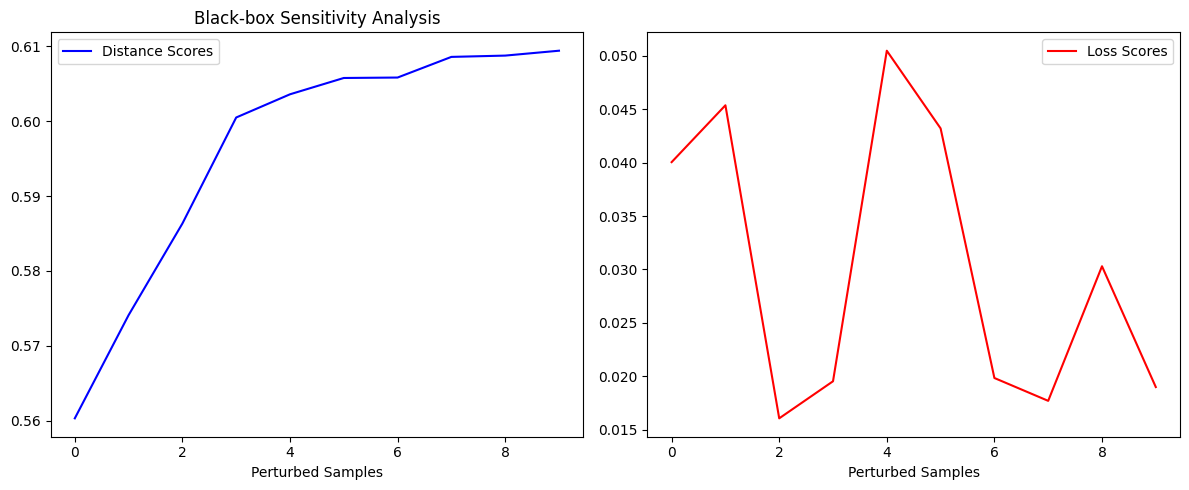

In [22]:
lime_exp.plot_blackbox_evaluation(distance_scores, mse_scores)

In [23]:
best_samples.shape

(10, 10, 4)

In [24]:
lime_exp.average_feature_effect(best_samples, best_samples_pred)

LinAlgError: 1-dimensional array given. Array must be two-dimensional